In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [250]:
df = pd.read_excel("./crawl_result/ETF50/2412.xlsx")

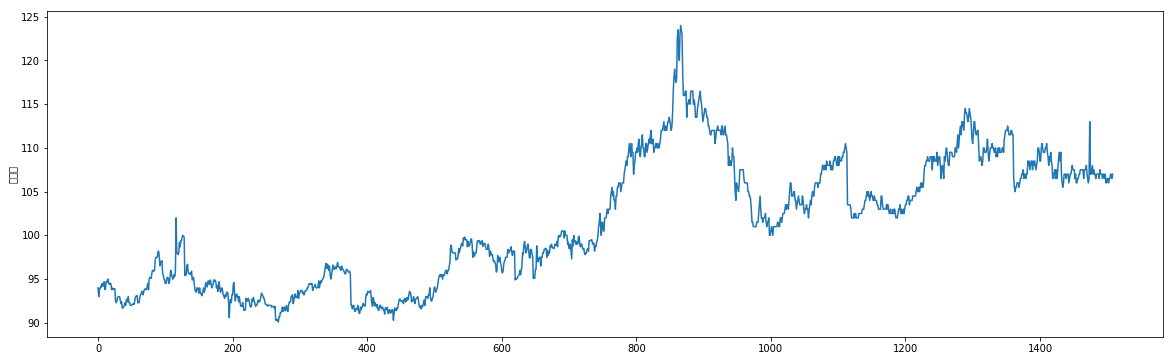

In [251]:
plt.figure(figsize=(20,6))
#plt.plot(list(df["收盤價"])[1200:1300])
sns.lineplot(y=df["收盤價"], x=list(range(len(df["收盤價"]))))

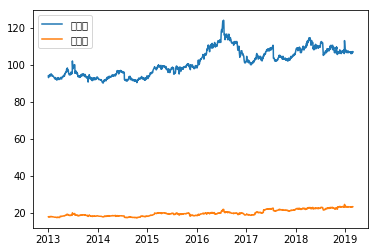

In [254]:
# multiple line plot
plt.plot('date', '收盤價', data=working_df)
plt.plot('date', '本益比', data=working_df)
plt.legend()


In [256]:
working_df[working_df["date"]<datetime.datetime(2019,1,1)]["本益比"].describe()

count    1475.000000
mean       19.784698
std         1.659439
min        17.200000
25%        18.380000
50%        19.500000
75%        21.270000
max        24.510000
Name: 本益比, dtype: float64

In [253]:
#整理資料
df["收盤價"] = df["收盤價"].replace("--", None).astype(float)
df["開盤價"] = df["開盤價"].replace("--", None).astype(float)
df.sort_values(by="date", inplace=True)
#操作df
working_df = df

In [227]:
def backtrace_baseline(start_date, end_date, money_in_pocket, shares, freeze_days, working_df):
    working_df["100_MA"] = working_df["收盤價"].rolling(window=100).mean()
    last_buy_date = start_date - datetime.timedelta(days=5)
    for idx, row in working_df.iterrows():
        if row["date"]<start_date:
            continue
        if row["date"]>=end_date:
            return money_in_pocket, shares, row["收盤價"]
        if row["100_MA"]-row["開盤價"] >=5:
            #買進一張
            if money_in_pocket > row["開盤價"] and last_buy_date and row['date']>last_buy_date+datetime.timedelta(days=freeze_days):
                money_in_pocket -= row["開盤價"]
                shares += 1
                last_buy_date = row['date']
                print("{} 買進一張 差距：{}".format(row['date'], row["100_MA"]-row["開盤價"]))
            else:
                pass
                #print("{} 要買進一張，但沒錢了～".format(row['date']))
        elif row["開盤價"] - row["100_MA"] >=5:
            if shares >=1 :
                money_in_pocket += row["開盤價"]
                shares -= 1
                print("{} 賣出一張 差距：{}".format(row['date'], row["開盤價"]-row["100_MA"]))
            else:
                pass
                #print("{} 要賣出一張，但賣完了～".format(row['date']))
    return money_in_pocket, shares, row["收盤價"]

In [248]:
def backtrace_PER(start_date, end_date, money_in_pocket, shares, freeze_days, working_df):
    working_df["100_PER"] = working_df["本益比"].rolling(window=100).mean()
    last_buy_date = start_date - datetime.timedelta(days=5)
    for idx, row in working_df.iterrows():
        if row["date"]<start_date:
            continue
        if row["date"]>=end_date:
            return money_in_pocket, shares, row["收盤價"]
        if row["100_MA"]-row["開盤價"] >=1 and row["100_PER"]-row["本益比"] >=1: #買進條件
            if money_in_pocket > row["開盤價"] and last_buy_date and row['date']>last_buy_date+datetime.timedelta(days=freeze_days):
                money_in_pocket -= row["開盤價"]
                shares += 1
                last_buy_date = row['date']
                print("{} 買進一張 差距：{}".format(row['date'], row["100_MA"]-row["開盤價"]))
            else:
                pass
                #print("{} 要買進一張，但沒錢了～".format(row['date']))
        elif row["開盤價"] - row["100_MA"] >=1 and row["本益比"] - row["100_PER"] >=1: #賣出條件
            if shares >=1 :
                money_in_pocket += row["開盤價"]
                shares -= 1
                print("{} 賣出一張 差距：{}".format(row['date'], row["開盤價"]-row["100_MA"]))
            else:
                pass
                #print("{} 要賣出一張，但賣完了～".format(row['date']))
    return money_in_pocket, shares, row["收盤價"]

In [258]:
#baseline
freeze_days = 5

start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2014,12,31)
money_in_pocket, shares, end_price = backtrace_baseline(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
money_in_pocket, shares, end_price = backtrace_baseline(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime(2016,12,31)
money_in_pocket, shares, end_price = backtrace_baseline(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2017,1,1)
end_date = datetime.datetime(2017,12,31)
money_in_pocket, shares, end_price = backtrace_baseline(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2018,12,31)
money_in_pocket, shares, end_price = backtrace_baseline(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0


In [263]:
# PER naive
freeze_days = 0

start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2014,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime(2016,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2017,1,1)
end_date = datetime.datetime(2017,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2018,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2018,12,31)
money_in_pocket, shares, end_price = backtrace_PER(start_date, end_date, 100, 0, freeze_days, working_df)
print("total: {}, money: {}, shares: {}".format(money_in_pocket+(shares*end_price), money_in_pocket, shares))

total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
total: 100.0, money: 100, shares: 0
